In [7]:
# Step 1: Upload ZIP file ke Google Colab
from google.colab import files
import zipfile
import pandas as pd

# Remove the path argument, files.upload() expects no arguments to open the upload dialog.
uploaded = files.upload()  # Ini akan membuka dialog untuk mengunggah file ZIP

# Step 2: Ekstrak file ZIP
zip_filename = list(uploaded.keys())[0]  # Ambil nama file ZIP yang diunggah
extract_folder = "extracted_data"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Ekstrak ke folder

Saving Data Science Salaries (2023).zip to Data Science Salaries (2023).zip


In [12]:
# Step 3: Cari file CSV di dalam ZIP
import os

csv_files = [f for f in os.listdir(extract_folder) if f.endswith(".csv")]
csv_path = os.path.join(extract_folder, csv_files[0])  # Ambil file CSV pertama

# Step 4: Baca dataset
df = pd.read_csv(csv_path)

In [8]:
import pandas as pd

# Ensure the path is correct, it's assumed your CSV file is named 'ds_salaries.csv':
csv_path = "extracted_data/ds_salaries.csv"
df = pd.read_csv(csv_path)

# Now you can use 'df' as your DataFrame for the rest of the code.

# Get the feature names from the DataFrame's columns
feature_names = df.columns[:-1]  # Exclude the target column

X = df[feature_names].values   # inputan untuk machine learning
y = df["salary_in_usd"].values  # output yang dinginkan dari machine learning

# Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=feature_names)
df_y = pd.Series(y, name='target')

# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,target
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,85847
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,30000
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,25500
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,175000
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,120000
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,222200
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,136000
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,219000
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,141000
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,147100


In [11]:
# Step 5: Tampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [39]:
df['target'].unique()

array([ 85847,  30000,  25500, ...,  28369, 412000,  94665])

In [40]:
df.describe()

,target
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


In [10]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [21]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')
#Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')
#Replace values in Company size column
if 'company_size' in df.columns:
    df['company_size'] = df['company_size'].replace('L', "Large")
    df['company_size'] = df['company_size'].replace('M', "Medium")
    df['company_size'] = df['company_size'].replace('S', "Small")
else:
    print("Column 'company_size' not found in the DataFrame.")
#show the dataset top row result
styled_df = df.head(5).style.set_properties(**{'background-color': '#74A12E ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

Column 'company_size' not found in the DataFrame.


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,target
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,85847
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000,US,100,US,30000
2,2023,Mid-Level,Contractor,ML Engineer,25500,USD,25500,US,100,US,25500
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,175000
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,120000


In [29]:
# Step 6: Buat kategori gaji (Low, Medium, High)
def categorize_salary(salary):
    if salary < 100000:
        return "Low"
    elif salary <= 175000:
        return "Medium"
    else:
        return "High"

df["salary_category"] = df["salary_in_usd"].apply(categorize_salary)

# Step 7: Tampilkan distribusi kategori gaji
print("\nDistribusi Kategori Gaji:")
print(df["salary_category"].value_counts())


Distribusi Kategori Gaji:
salary_category
Medium    1832
Low        991
High       932
Name: count, dtype: int64


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# 1️⃣ Pilih fitur yang akan digunakan
# ✅ Replace 'company_size' with the actual column name in your DataFrame
selected_features = ["salary_in_usd", "remote_ratio", "experience_level", "employment_type", "job_title", "company_location"]

# ✅ Check if all selected features are present in the DataFrame columns
missing_features = [feature for feature in selected_features if feature not in df.columns]
if missing_features:
    # ✅ If features are missing, print the available columns and raise the KeyError
    print(f"Available columns in the DataFrame: {df.columns.tolist()}")
    raise KeyError(f"The following features are not in the DataFrame: {missing_features}")

X = df[selected_features]  # Fitur (independent variables)
y = df["salary_category"]  # Target (dependent variable)

# 2️⃣ Encoding data kategori
label_encoders = {}  # Simpan encoder untuk kategori
# ✅ Update the list for encoding if needed based on the changed features
for col in ["experience_level", "employment_type", "company_location"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Ubah jadi angka
    label_encoders[col] = le  # Simpan encoder untuk nanti

# One-Hot Encoding untuk "job_title" (karena banyak kategorinya)
X = pd.get_dummies(X, columns=["job_title"])

# 3️⃣ Membagi dataset menjadi training & testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ Normalisasi (Opsional - hanya jika pakai KNN atau SVM)
scaler = StandardScaler()
X_train[["salary_in_usd", "remote_ratio"]] = scaler.fit_transform(X_train[["salary_in_usd", "remote_ratio"]])
X_test[["salary_in_usd", "remote_ratio"]] = scaler.transform(X_test[["salary_in_usd", "remote_ratio"]])

# Cek hasil akhir
print(f"Shape X_train: {X_train.shape}, Shape X_test: {X_test.shape}")
print("Data preprocessing selesai! 🚀")


Shape X_train: (3004, 98), Shape X_test: (751, 98)
Data preprocessing selesai! 🚀


<ipython-input-70-c6b0da5e378c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])  # Ubah jadi angka
<ipython-input-70-c6b0da5e378c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])  # Ubah jadi angka
<ipython-input-70-c6b0da5e378c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Buat model Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=69)

# 2. Latih model dengan data training
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=69)

In [65]:
from sklearn.metrics import accuracy_score

# 1. Memprediksi dan mengevaluasi
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Laporan Klasifikasi:")
print(f"🎯 Akurasi Model: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
🎯 Akurasi Model: 98.67%


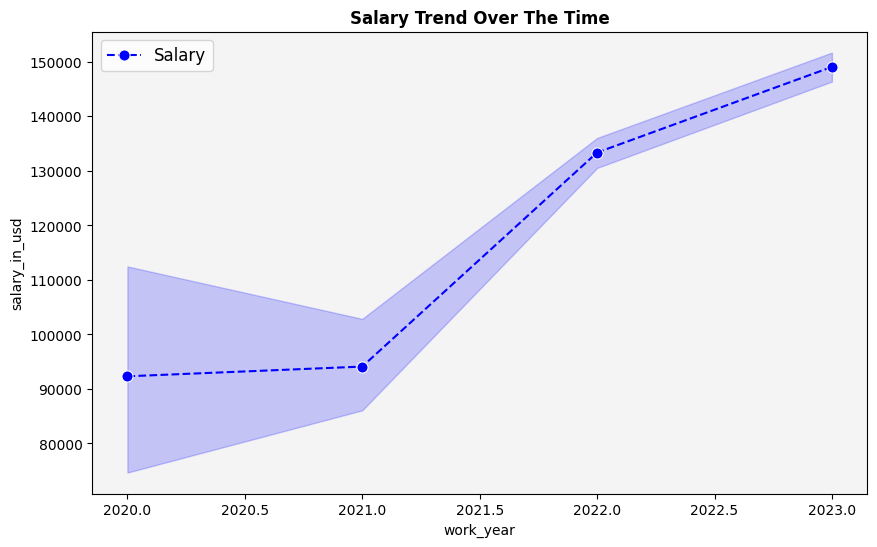

In [25]:
# Add this line at the beginning of your code cell
import matplotlib.pyplot as plt
import seaborn as sns # Import the seaborn library

plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

In [41]:
plt.figure(figsize=(10, 6))

# Ensure 'company_size' is in your DataFrame 'df'
# If it's not, you may need to reload or re-create your DataFrame
# with the 'company_size' column.

# ✅ Check if 'company_size' is in the DataFrame
if 'company_size' not in df.columns:
    print("Column 'company_size' not found in the DataFrame. Please check your data.")
else:
    # If 'company_size' is present, proceed with the lineplot:
    p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

    plt.xlabel('Year Work', fontsize=12, fontweight='bold')
    plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

    # Add a legend
    plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

    # Add a title
    plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')

    # Customize the background color
    p.set_facecolor("#f4f4f4")

    # Remove the grid lines
    p.grid(False)
    plt.show()

Column 'company_size' not found in the DataFrame. Please check your data.


<Figure size 1000x600 with 0 Axes>

<ipython-input-40-39fd888680e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')


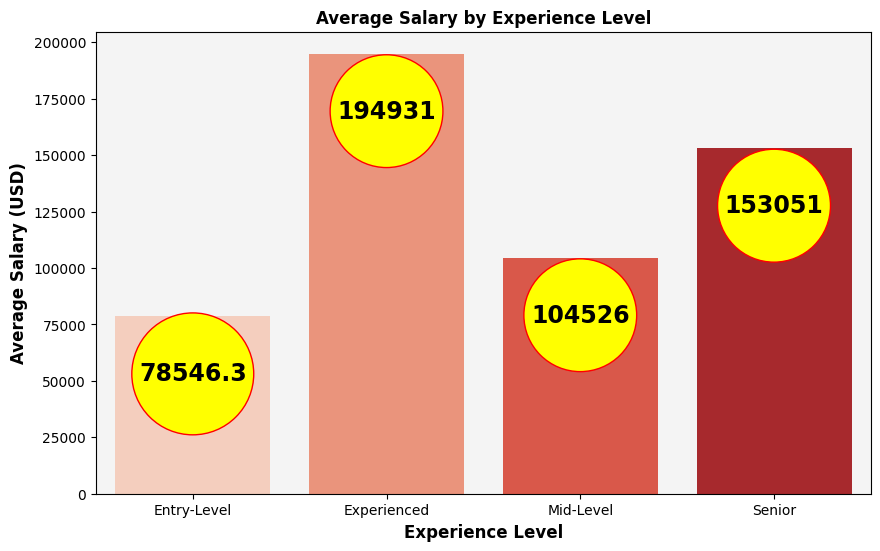

In [40]:
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'circle',
                        'edgecolor': 'red',
                        'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'
                )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()

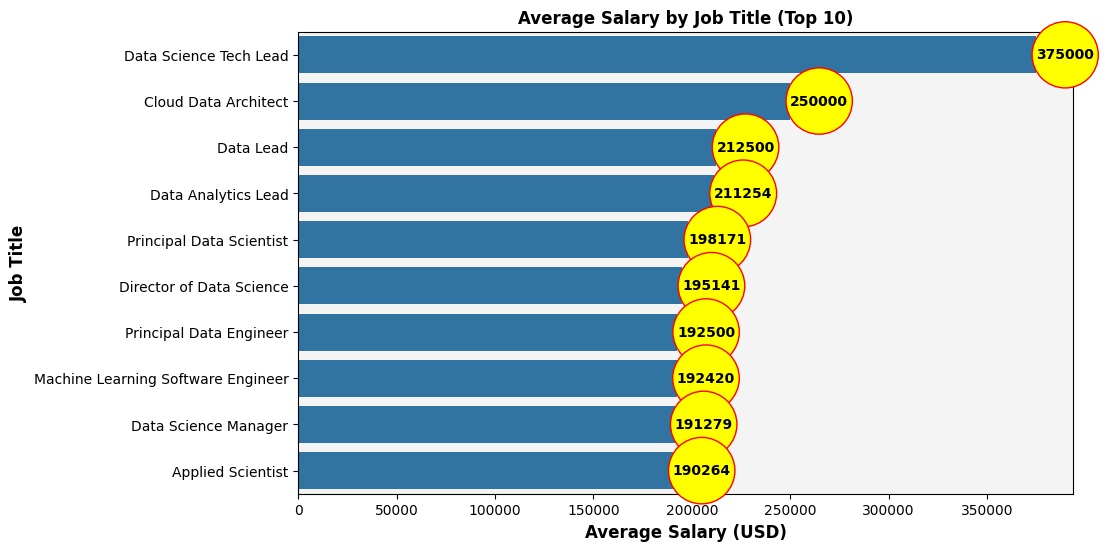

In [42]:
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10])

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,

                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight = 'bold'


               )
# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

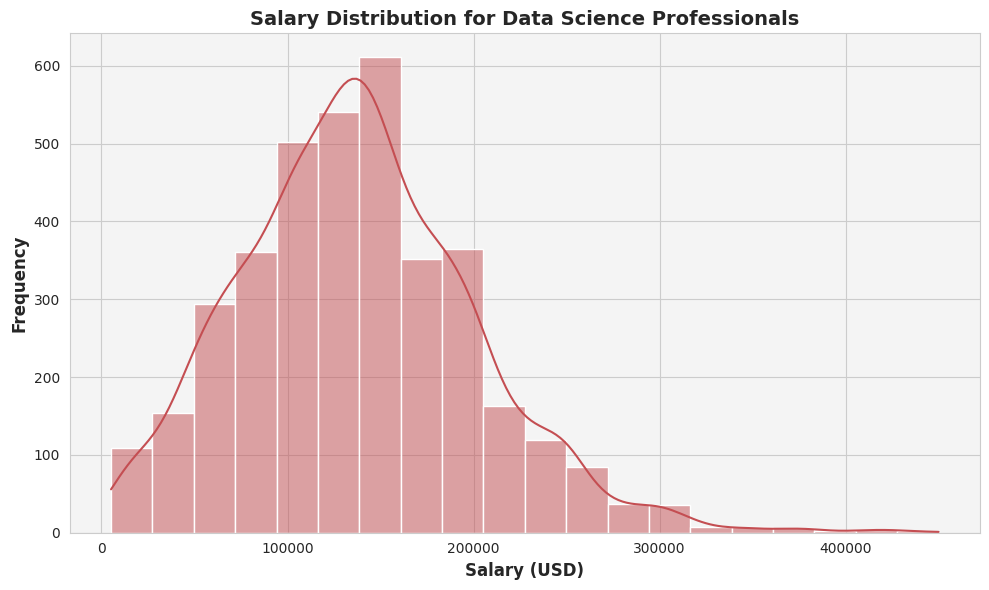

In [43]:
# Set a custom style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)

# Customize labels and title
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-44-a21ac00ce643>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')


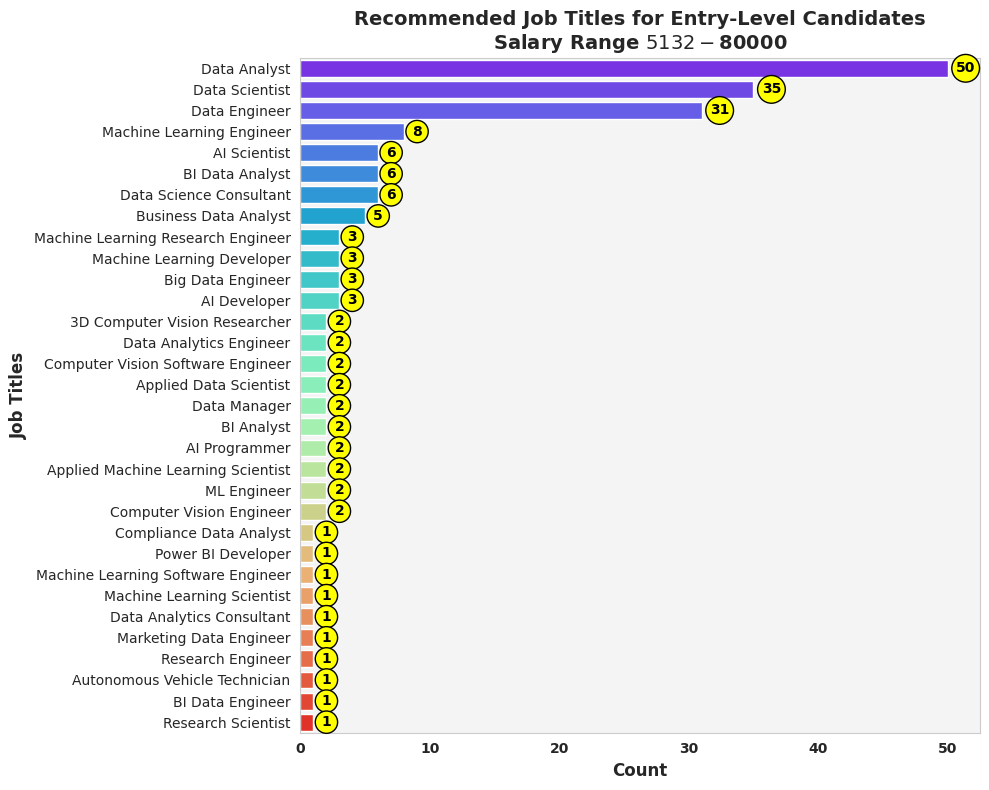

In [44]:
# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5132, 80000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Create a horizontal bar chart using Seaborn with a different color palette
plt.figure(figsize=(10, 8))



ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=10,
                 bbox={'boxstyle': 'circle,pad=0.3', 'facecolor': 'yellow', 'edgecolor': 'black'})

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()

<ipython-input-46-05f3b34a1f27>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(data=df, x=df[col], ax=axis[i], palette= "rainbow_r")
<ipython-input-46-05f3b34a1f27>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=40)
<ipython-input-46-05f3b34a1f27>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(data=df, x=df[col], ax=axis[i], palette= "rainbow_r")
<ipython-input-46-05f3b34a1f27>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[i].set_xticklab

Column 'company_size' not found in DataFrame, skipping plot.


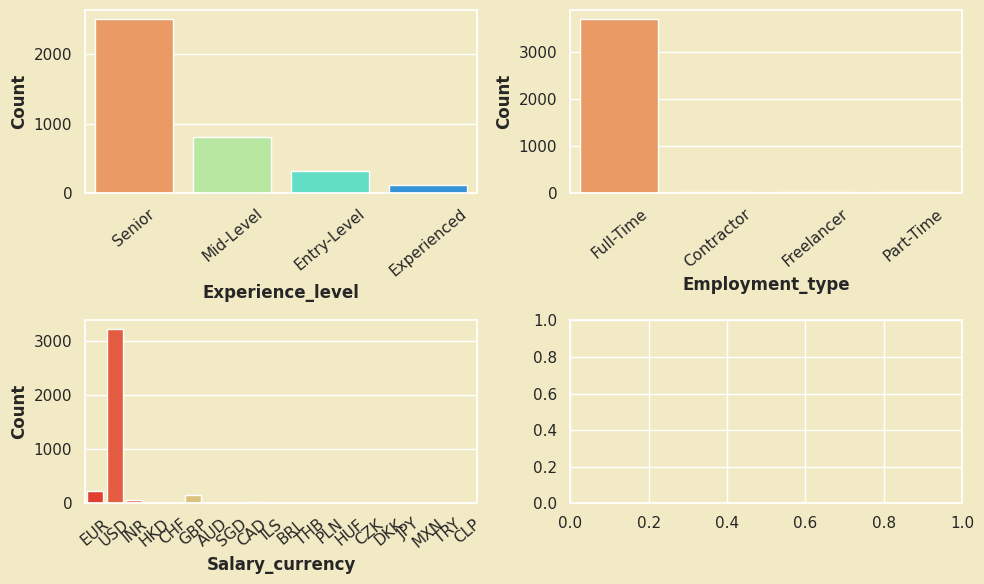

In [46]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

columns = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
axis = axis.flatten()
for i, col in enumerate(columns):
    # Check if the column exists in the DataFrame before plotting
    if col in df.columns:
        p = sns.countplot(data=df, x=df[col], ax=axis[i], palette= "rainbow_r")
        axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=40)
        axis[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold')
        axis[i].set_ylabel('Count', fontsize=12, fontweight='bold')
    else:
        print(f"Column '{col}' not found in DataFrame, skipping plot.")

# Remove any remaining empty subplots
for j in range(len(columns), len(axis)):
    fig.delaxes(axis[j])


plt.tight_layout()
plt.show()

In [54]:
# Tampilkan Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.99      0.99       186
         Low       0.99      0.96      0.98       198
      Medium       0.98      1.00      0.99       367

    accuracy                           0.99       751
   macro avg       0.99      0.98      0.99       751
weighted avg       0.99      0.99      0.99       751



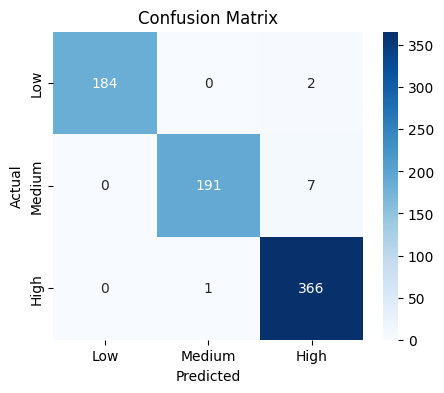

In [55]:
# Tampilkan Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# 1️⃣ Pilih fitur yang akan digunakan
selected_features = ["salary_in_usd", "remote_ratio", "experience_level", "employment_type", "job_title", "company_location"]

# ✅ Check if all selected features are present in the DataFrame columns
missing_features = [feature for feature in selected_features if feature not in df.columns]
if missing_features:
    # ✅ If features are missing, print the available columns and raise the KeyError
    print(f"Available columns in the DataFrame: {df.columns.tolist()}")
    raise KeyError(f"The following features are not in the DataFrame: {missing_features}")

X = df[selected_features]  # Fitur (independent variables)
y = df["salary_category"]  # Target (dependent variable)

# 2️⃣ Encoding data kategori
label_encoders = {}  # Simpan encoder untuk kategori
for col in ["experience_level", "employment_type", "company_location"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Ubah jadi angka
    label_encoders[col] = le  # Simpan encoder untuk nanti

# One-Hot Encoding untuk "job_title" (karena banyak kategorinya)
X = pd.get_dummies(X, columns=["job_title"])

# 3️⃣ Membagi dataset menjadi training & testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ Normalisasi (Opsional - hanya jika pakai KNN atau SVM)
scaler = StandardScaler()
X_train[["salary_in_usd", "remote_ratio"]] = scaler.fit_transform(X_train[["salary_in_usd", "remote_ratio"]])
X_test[["salary_in_usd", "remote_ratio"]] = scaler.transform(X_test[["salary_in_usd", "remote_ratio"]])

# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=69)
model.fit(X_train, y_train) # Now X_train and y_train are defined before this line

<ipython-input-30-a4fc09084ab0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])  # Ubah jadi angka
<ipython-input-30-a4fc09084ab0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])  # Ubah jadi angka
<ipython-input-30-a4fc09084ab0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

RandomForestClassifier(random_state=69)

In [74]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi: 100.00%
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       186
         Low       1.00      1.00      1.00       198
      Medium       1.00      1.00      1.00       367

    accuracy                           1.00       751
   macro avg       1.00      1.00      1.00       751
weighted avg       1.00      1.00      1.00       751



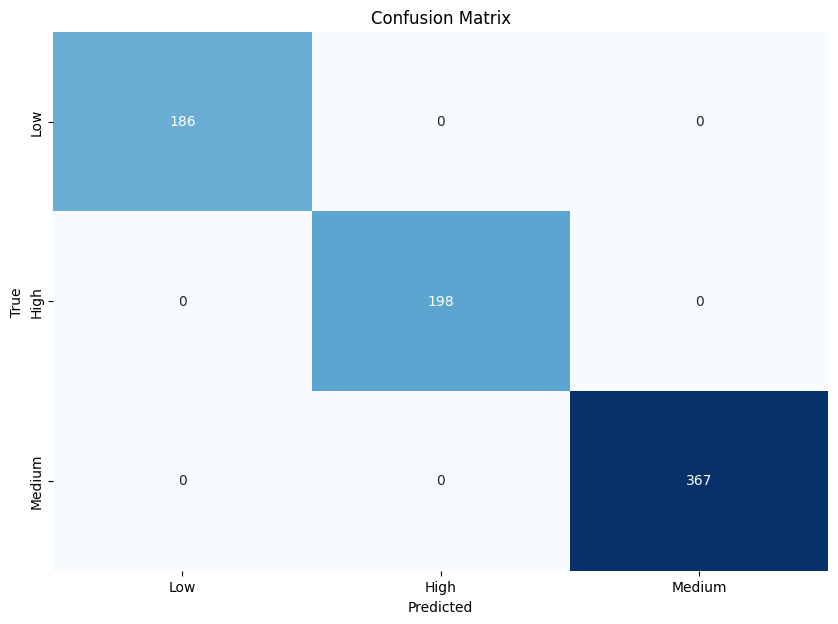

<ipython-input-83-625f4ee9e06e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Akurasi'], y=[accuracy], palette='viridis')


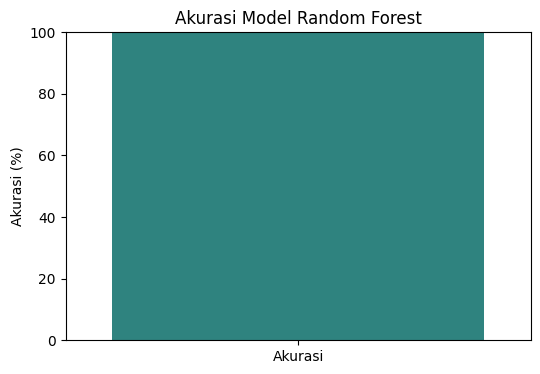

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Get unique classes from y_test or y_train
classes = y_test.unique()  # or classes = y_train.unique()

# Membuat DataFrame dari confusion matrix
# ✅ Use classes directly instead of label_encoder.classes_
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualisasi akurasi
accuracy = accuracy * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=['Akurasi'], y=[accuracy], palette='viridis')
plt.ylim(0, 100)
plt.title('Akurasi Model Random Forest')
plt.ylabel('Akurasi (%)')
plt.show()

In [31]:
from sklearn.svm import SVC

# Membuat model SVM
model = SVC(kernel='linear', random_state=69)  # Anda bisa mencoba kernel yang berbeda
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=69)

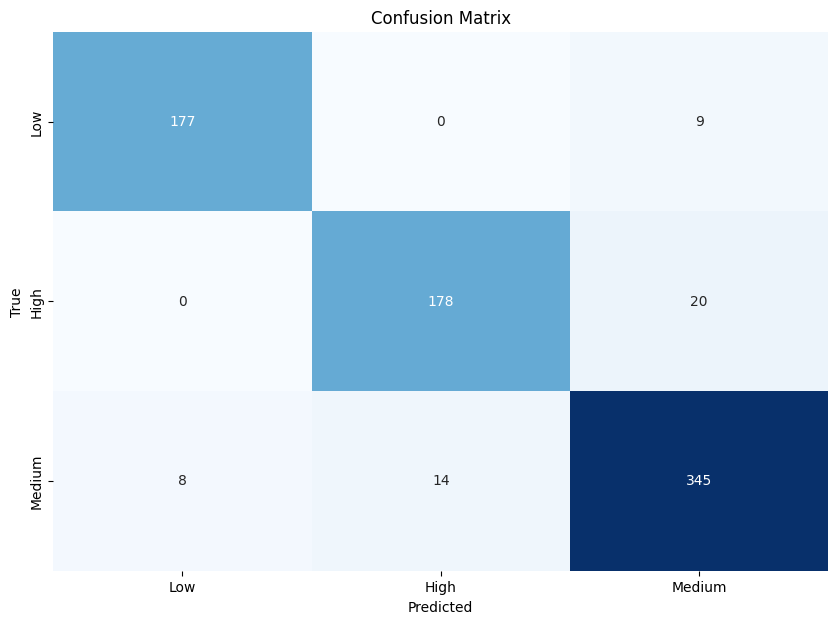

<ipython-input-88-76770e3361ea>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Akurasi'], y=[accuracy * 100], palette='viridis')


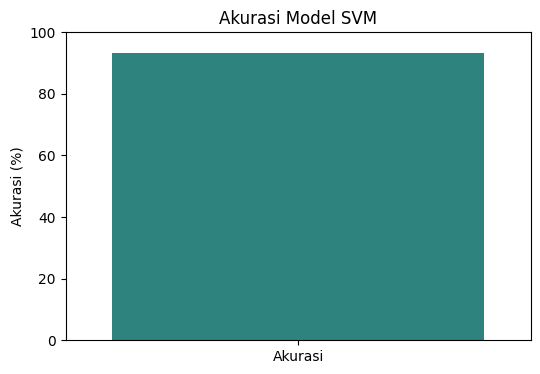

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Get unique classes from y_test or y_train
classes = y_test.unique()  # or classes = y_train.unique() if y_test is unavailable

# Membuat DataFrame dari confusion matrix
# ✅ Use classes directly instead of label_encoder.classes_
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualisasi akurasi
plt.figure(figsize=(6, 4))
sns.barplot(x=['Akurasi'], y=[accuracy * 100], palette='viridis')
plt.ylim(0, 100)
plt.title('Akurasi Model SVM')
plt.ylabel('Akurasi (%)')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=69)  # Anda bisa mencoba jumlah neighbors yang berbeda
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=69)

In [84]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi: 93.21%
              precision    recall  f1-score   support

        High       0.96      0.95      0.95       186
         Low       0.93      0.90      0.91       198
      Medium       0.92      0.94      0.93       367

    accuracy                           0.93       751
   macro avg       0.94      0.93      0.93       751
weighted avg       0.93      0.93      0.93       751



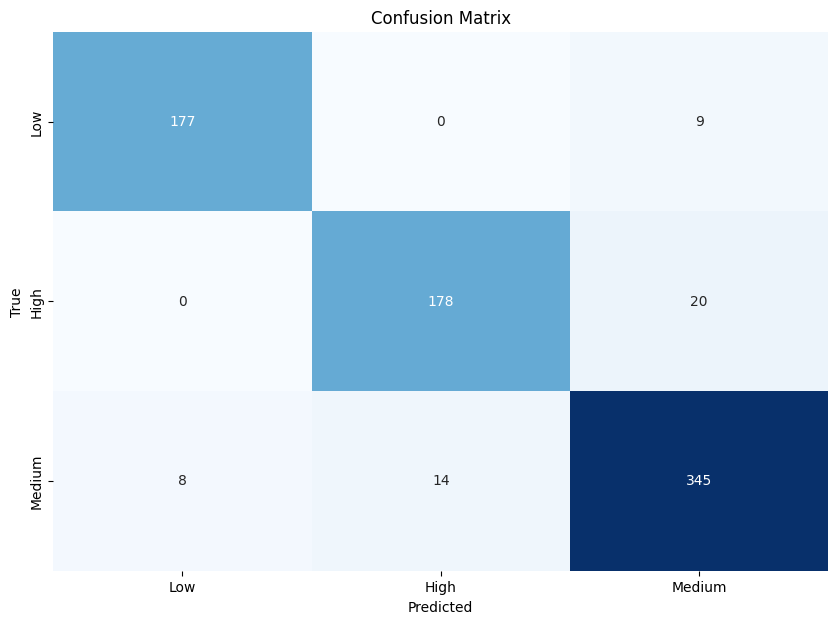

<ipython-input-86-5060211e4217>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Akurasi'], y=[accuracy * 100], palette='viridis')


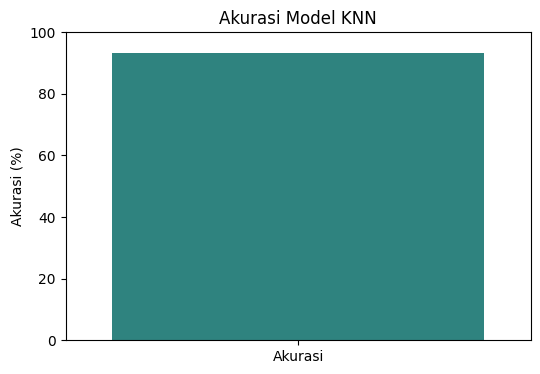

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Get unique classes from y_test directly
classes = y_test.unique()

# Membuat DataFrame dari confusion matrix
# ✅ Use the classes variable directly
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualisasi akurasi
plt.figure(figsize=(6, 4))
sns.barplot(x=['Akurasi'], y=[accuracy * 100], palette='viridis')
plt.ylim(0, 100)
plt.title('Akurasi Model KNN')
plt.ylabel('Akurasi (%)')
plt.show()